In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
from scipy.special import comb
from scipy.constants import Boltzmann as kb

In [2]:
def condition_sum(Array,a,b):
    Array1 = []
    for k in range(a,b):
        Array1.append(Array[k])
    return sum(Array1)

In [3]:
def condition_average_sum(input_array, no_of_points):
    lim1 = 0
    lim2 = lim1 + no_of_points
    new_arr = []
    Array = []
    for i in range(int(len(input_array) / no_of_points)):
        new_arr = []
        for j in range(lim1, lim2):
            new_arr.append(input_array[j])
        Array.append(sum(new_arr) / len(new_arr))
        lim1 = lim1 + no_of_points
        lim2 = lim1 + no_of_points
        if lim2 > len(input_array):
            return Array

In [4]:
def Energy_Distribution(Nsys, qsys):
    if qsys == 0:
        N = np.zeros(Nsys)
        Nq_list = []
        for i in range(0, len(N)):
            Nq_list.append(N[i])
        return Nq_list

    else:
        # Making copy of the energy input so that it can be used in appropriate times
        qcopy = copy.copy(qsys)
        # Array of Number of particles in the system.
        N = np.zeros(Nsys)
        # Randomly distributing energy in the system and it is containing the 'N' array
        for i in range(0, Nsys):
            N[i] = np.random.randint(0,qsys)
            qsys = qsys - N[i]
        # Assing qsys the original value stored in qcopy
        qsys = qcopy
        if np.sum(N) != qsys:
            remainder = qsys - np.sum(N)
            # choosing a random place in the 'N' array to put the reamining energy
            random_place = np.random.randint(0,Nsys)
            N[random_place] = N[random_place] + remainder
        Nq_list = []
        for i in range(0, len(N)):
            Nq_list.append(N[i])
        return Nq_list

# MICRO-CANONICAL ENSEMBLE

In [5]:
def Micro_Canonical(N, Na, q, qa, Iterations, no_of_points):
    '''Monte-Carlo Simulation for Micro-Canonical Ensemble'''
    # Initializing the two systems
    # Initializing the number of particles in both the sysytems and it will remain constant throughout.
    # N is the total number of particles, Na and nb are the no.of particles in system and reservoir
    Nb = N - Na
    
    # Initializing the Energy of the two system.
    # Both qa and qb are initial energy of the two systems.
    # q is the initial total energy
    qb = q - qa

    print('Na = ',Na)
    print('Nb = ',Nb)
    print('qa = ', qa)
    print('qb = ', q - qa)
    print('The initial qa/Na = ', qa / Na)
    print('The initial qb/Nb = ', qb / Nb)
    print('No.of Iterations = ', Iterations)
    print('\n')
    # Getting the array of array of particles with each having their energy randomly assigned.
    Nqa_list = Energy_Distribution(Na, qa)
    Nqb_list = Energy_Distribution(Nb, qb)

    # Getting the array of array of particles with each having their energy randomly assigned.
    Nqa_list = Energy_Distribution(Na, qa)
    Nqb_list = Energy_Distribution(Nb, qb)
    # Concatenating the two Nqa and Nqb lists for easier calculations.
    Nq_list = Nqa_list + Nqb_list
    # Now converting the Nq_list into numpy array
    Nq_list = np.array(Nq_list)
    # Simulating the development of the system.
    # Each Iteration carried will stored in the time array
    time = np.zeros(Iterations)
    # Ea will be appended with energy content Na paricles in system A after each iteration of interaction is 
    # carried out
    Ea = np.zeros(Iterations)
    # Eb will be appended with energy content Nb paricles in system B after each iteration of interaction is 
    # carried out
    Eb = np.zeros(Iterations)
    # Sa_arr will be appended with the Entropy of the system A after each iteration of interaction is carried
    # out.
    Sa_arr = np.zeros(Iterations)
    # Sb_arr will be appended with the Entropy of the system B after each iteration of interaction is carried
    # out.
    Sb_arr = np.zeros(Iterations)
    
    # Temperatures
    # Temperature of system A
    Ta_kb = np.zeros(Iterations)
    # Temperature of system B
    Tb_kb = np.zeros(Iterations)
    
    """Any two particles ri and rj in the system A + B are selected and energy transfer takes place 
    from ri to rj if ri has atleast one unit of energy"""
    for i in range(0,Iterations):
        # i represents iterations which in turns gives information about time evolution
        time[i] = i

        # Randomly selecting two particles in the Nq_list
        ri = np.random.randint(0,len(Nq_list) - 1)
        rj = np.random.randint(0,len(Nq_list) - 1)

        # Imposing condition for Energy exchange between two systems
        # If ri particle has atleast one unit of energy then energy transfer will take place.
        if (Nq_list[ri] >= 1) and (ri != rj):
            Nq_list[rj] = Nq_list[rj] + 1
            Nq_list[ri] = Nq_list[ri] - 1
        # Calculating the Energy of system A after each iteration and let its name be qai
        qai = condition_sum(Nq_list, 0, Na)
        Ea[i] = qai

        # Calculating the Energy of system B after each iteration and let its name be qbi
        qbi = condition_sum(Nq_list, Na, Na + Nb)
        Eb[i] = qbi

        # Calculating Entropy / kb of system A i.e. (Sa/kb) after each iteration and putting it in Sa_arr
        omega_a = comb((Na - 1 + qai), qai)
        Sa_kb = np.log(omega_a)
        Sa_arr[i] = Sa_kb

        # Calculating Entropy / kb of system B i.e. (Sb/kb) after each iteration and putting it in Sb_arr
        omega_b = comb((Nb - 1 + qbi), qbi)
        Sb_kb = np.log(omega_b)
        Sb_arr[i] = Sb_kb
        
        # Temperatures
        # Calculating the Temperature of system A
        Ta_kb[i] = (2 / 3) * (qai / Na) 
        # Calculating the Temperature of system B
        Tb_kb[i] = (2 / 3) * (qbi / Nb) 
    
    # Calculating Helmoltz free Energy of system A
    Fa = Ea - (Ta_kb * Sa_arr)
    # Calculating Helmoltz free Energy of system B
    Fb = Eb - (Tb_kb * Sb_arr)

    # Total Entropy of the system is Stot = Sa_arr + Sb_arr of each iteration
    Stot = Sa_arr + Sb_arr

    # Total Helmoltz free energy of the system A and B 
    Ftot = Fa + Fb
    
    # Plotting the quantities
    print('The graphs before averaging')
    print('\n')
    plotting_list = [Sa_arr, Sb_arr, Stot, Ea, Eb, Fa, Fb, Ftot]
    colors = ['dodgerblue', 'limegreen', 'cyan', 'red', 'deeppink', 'orange', 'blue', 'blueviolet']
    plotting_names = ['Sa', 'Sb', 'S total', 'Ea', 'Eb', 'Fa = Ea - Ta*Sa', 'Fb = Eb - Tb*Sb', 'F total']
    
#     save_name = ['c1mco-sa.jpg', 'c1mco-sb.jpg', 'c1mco-st.jpg', 'c1mco-ea.jpg', 'c1mco-eb.jpg', 
#               'c1mco-fa.jpg', 'c1mco-fb.jpg', 'c1mco-ft.jpg']
    
    for p in range(0, len(plotting_list)):
        plt.plot(time, plotting_list[p], color = colors[p])
        plt.xlabel('time')
        plt.ylabel(plotting_names[p])
        plt.show()
#         plt.savefig(save_name[p])
        
    # Using the condition_average_sum to make new arrays
    time_new = condition_average_sum(time, no_of_points)
    Ea_new = condition_average_sum(Ea, no_of_points)
    Eb_new = condition_average_sum(Eb, no_of_points)
    Sa_arr_new = condition_average_sum(Sa_arr, no_of_points)
    Sb_arr_new = condition_average_sum(Sb_arr, no_of_points)
    Stot_new = condition_average_sum(Stot, no_of_points)
    Fa_new = condition_average_sum(Fa, no_of_points)
    Fb_new = condition_average_sum(Fb, no_of_points)
    Ftot_new = condition_average_sum(Ftot, no_of_points)
    
    # Plotting the quantities
    print('The graphs after averaging')
    print('\n')
    plotting_list = [Sa_arr_new, Sb_arr_new, Stot_new, Ea_new, Eb_new, Fa_new, Fb_new, Ftot_new]
    colors = ['dodgerblue', 'limegreen', 'cyan', 'red', 'deeppink', 'orange', 'blue', 'blueviolet']
    plotting_names = ['Sa', 'Sb', 'S total', 'Ea', 'Eb', 'Fa = Ea - Ta*Sa', 'Fb = Eb - Tb*Sb', 'F total']
    
#     save_name = ['c1mca-sa.jpg', 'c1mca-sb.jpg', 'c1mca-st.jpg', 'c1mca-ea.jpg', 'c1mca-eb.jpg', 
#               'c1mca-fa.jpg', 'c1mca-fb.jpg', 'c1mca-ft.jpg']
    
    for p in range(0, len(plotting_list)):
        plt.plot(time_new, plotting_list[p], color = colors[p])
        plt.xlabel('time')
        plt.ylabel(plotting_names[p])
        plt.show()
#         plt.savefig(save_name[p])

Case 1: Micro-Canonical Ensemble
Na =  100
Nb =  100
qa =  250
qb =  250
The initial qa/Na =  2.5
The initial qb/Nb =  2.5
No.of Iterations =  100000


The graphs before averaging




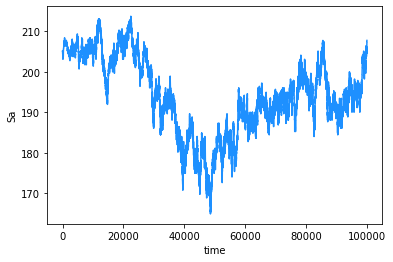

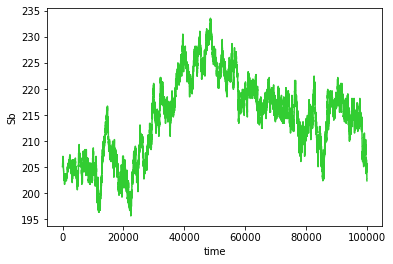

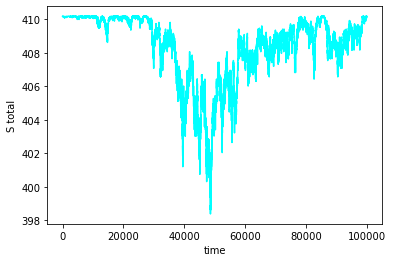

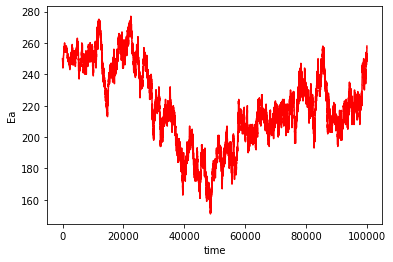

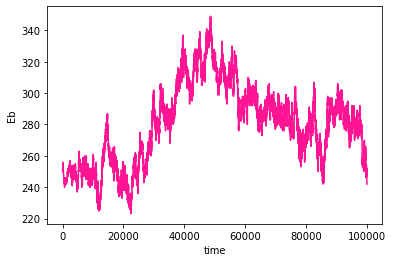

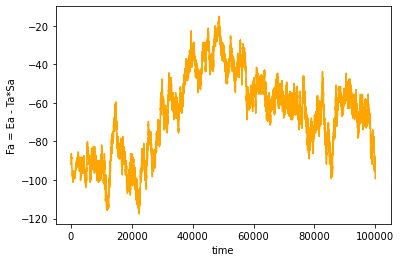

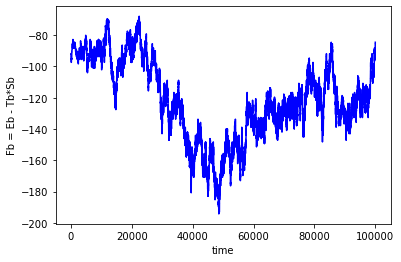

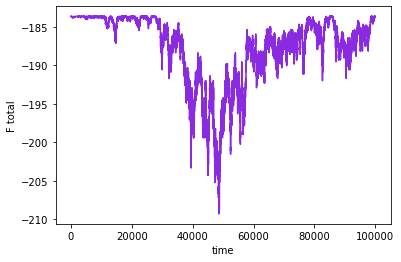

The graphs after averaging




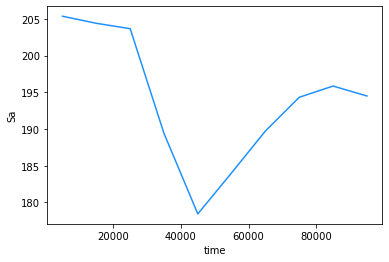

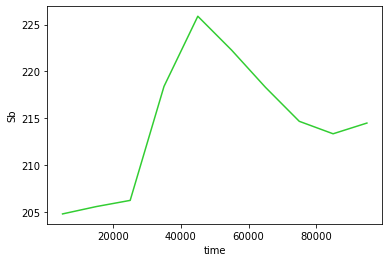

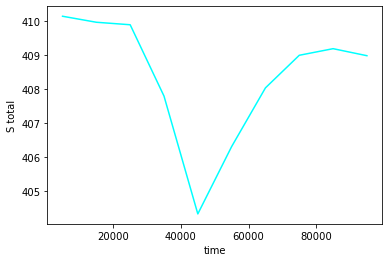

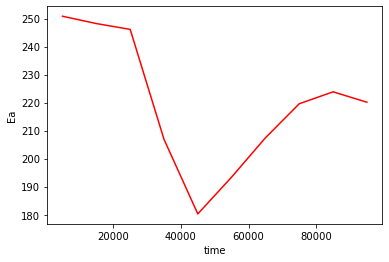

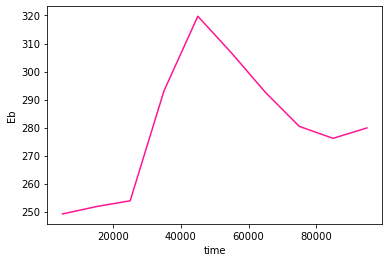

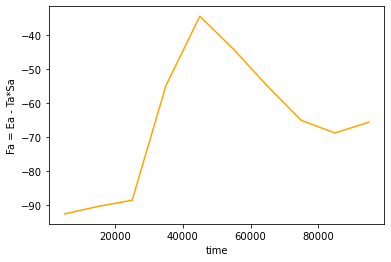

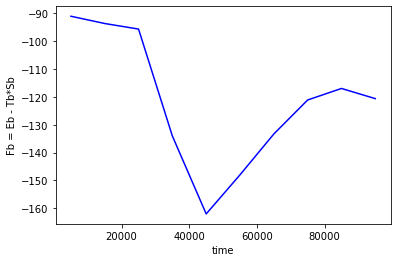

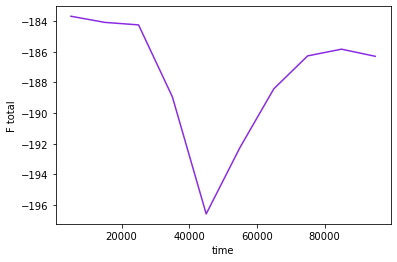

In [6]:
print('Case 1: Micro-Canonical Ensemble')
N = 200
Na = 100
q = 500
qa = 250
Iterations = 100000
no_of_points = 10000
Micro_Canonical(N, Na, q, qa, Iterations, no_of_points)

Case 2: Micro-Canonical Ensemble
Na =  100
Nb =  100
qa =  100
qb =  400
The initial qa/Na =  1.0
The initial qb/Nb =  4.0
No.of Iterations =  100000


The graphs before averaging




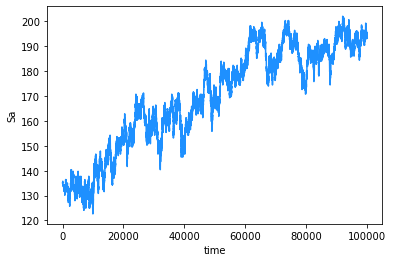

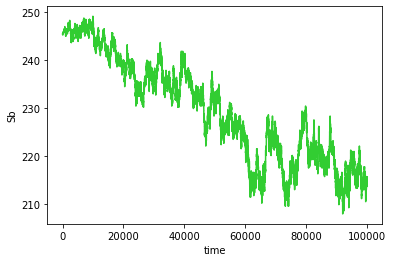

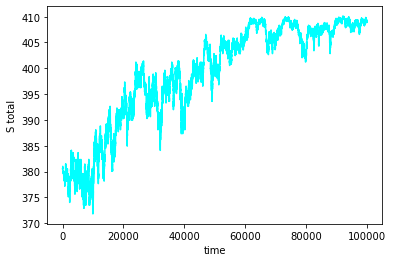

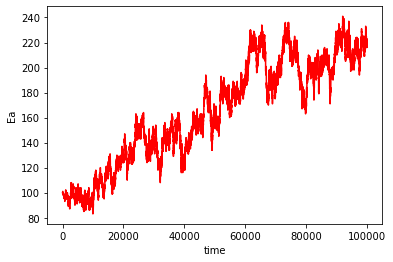

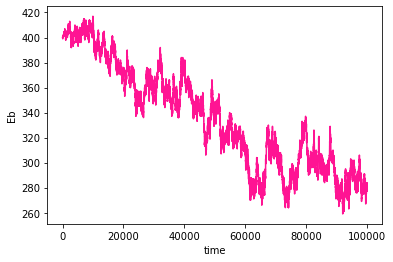

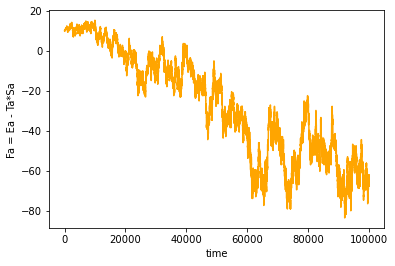

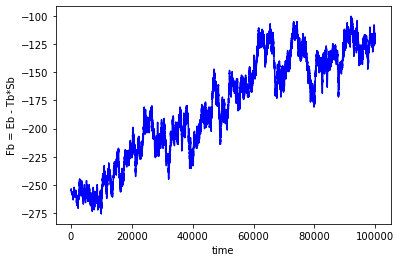

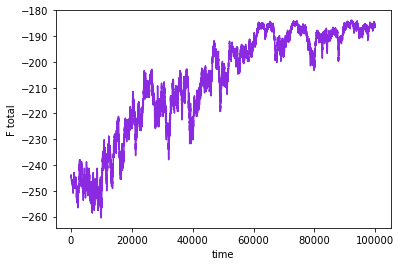

The graphs after averaging




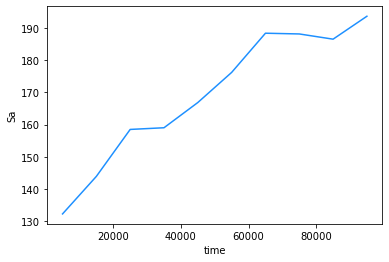

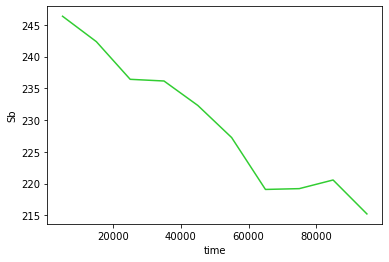

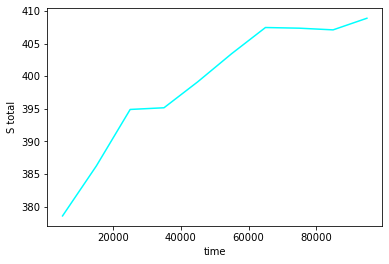

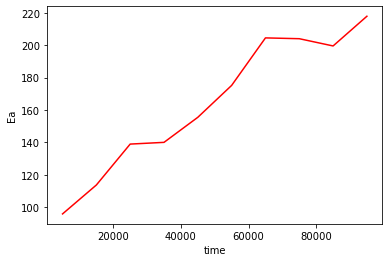

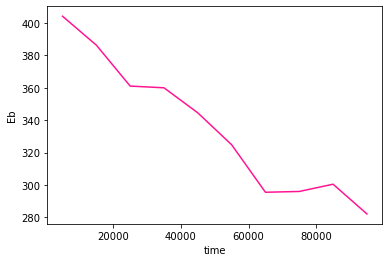

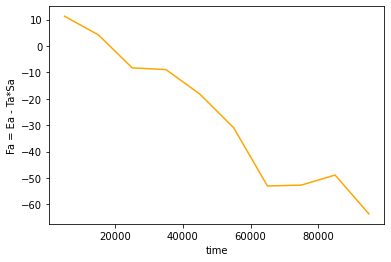

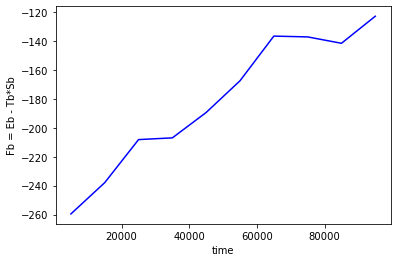

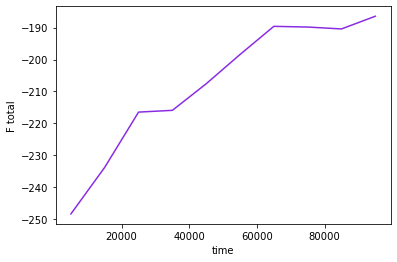

In [7]:
print('Case 2: Micro-Canonical Ensemble')
N = 200
Na = 100
q = 500
qa = 100
Iterations = 100000
no_of_points = 10000
Micro_Canonical(N, Na, q, qa, Iterations, no_of_points)

# CANONICAL ENSEMBLE

In [8]:
def Canonical(N, Na, q, qa, Iterations, no_of_points):
    '''Monte-Carlo Simulation for Canonical Ensemble'''
    # Initializing the two systems
    # Initializing the number of particles in both the sysytems and it will remain constant throughout.
    # N is the total number of particles
    Nb = N - Na

    # Initializing the Energy of the two system.
    # Both qa and qb are initial energy of the two systems.
    # q is the initial total energy
    qb = q - qa
    
    print('Na = ',Na)
    print('Nb = ',Nb)
    print('qa = ', qa)
    print('qb = ', q - qa)
    print('The initial qa/Na = ', qa / Na)
    print('The initial qb/Nb = ', qb / Nb)
    print('No. of Iterations = ', Iterations)
    print('\n')
    # Getting the array of array of particles with each having their energy randomly assigned.
    Nqa_list = Energy_Distribution(Na, qa)
    Nqb_list = Energy_Distribution(Nb, qb)

    # Concatenating the two Nqa and Nqb lists for easier calculations.
    Nq_list = Nqa_list + Nqb_list
    # Now converting the Nq_list into numpy array
    Nq_list = np.array(Nq_list)

    # Simulating the development of the system.
    # Each Iteration carried will stored in the time array
    time = np.zeros(Iterations)
    # Ea will be appended with energy content Na paricles in system A after each iteration of interaction is 
    # carried out
    Ea = np.zeros(Iterations)
    # Sa_arr will be appended with the Entropy of the system A after each iteration of interaction is carried
    # out.
    Sa_arr = np.zeros(Iterations)
    # Temperature Tb
    Tb_kb = np.zeros(Iterations)

    """Any two particles ri and rj in the system A + B are selected and energy transfer takes place 
    from ri to rj if ri has atleast one unit of energy"""
    for i in range(0,Iterations):
        # i represents iterations which in turns gives information about time evolution
        time[i] = i

        # Randomly selecting two particles in the Nq_list
        ri = np.random.randint(0,len(Nq_list) - 1)
        rj = np.random.randint(0,len(Nq_list) - 1)

        # Imposing condition for Energy exchange between two systems
        # If ri particle has atleast one unit of energy then energy transfer will take place.
        if (Nq_list[ri] >= 1) and (ri != rj):
            Nq_list[rj] = Nq_list[rj] + 1
            Nq_list[ri] = Nq_list[ri] - 1

        # Calculating the Energy of system A after each iteration and let its name be qai
        qai = condition_sum(Nq_list, 0, Na)
        Ea[i] = qai

        # Calculating Entropy / kb of system A i.e. (Sa/kb) after each iteration and putting it in Sa_arr
        omega_a = comb((Na - 1 + qai), qai)
        Sa_kb = np.log(omega_a)
        Sa_arr[i] = Sa_kb

        # Calculating the Energy of system B after each iteration and let its name be qbi
        qbi = condition_sum(Nq_list, Na, Nb)
        # Calculating Temperature, Tb = qbi / Nb
        Tb_kb[i] = (2 / 3) * (qbi / Nb) 

    # Calculating the quantity F = Ea - (Tb * Sa) and Ea is actually qai.
    Fa = Ea - (Tb_kb * Sa_arr)
    
    # Plotting the quantities>
    print('The graphs before averaging')
    print('\n')
    plotting_list = [Ea, Sa_arr, Fa]
    colors = ['dodgerblue', 'limegreen', 'orange']
    plotting_names = ['Ea', 'Sa', 'Fa = Ea - Ta*Sa']
    
    for p in range(0, len(plotting_list)):
        plt.plot(time, plotting_list[p], color = colors[p])
        plt.xlabel('time')
        plt.ylabel(plotting_names[p])
        plt.show()
    
    # Using the condition_average_sum to make new arrays
    time_new = condition_average_sum(time, no_of_points)
    Ea_new = condition_average_sum(Ea, no_of_points)
    Sa_arr_new = condition_average_sum(Sa_arr, no_of_points)
    Fa_new = condition_average_sum(Fa, no_of_points)
    
   # Plotting the quantities>
    print('The graphs before averaging')
    print('\n')
    plotting_list = [Ea_new, Sa_arr_new, Fa_new]
    colors = ['dodgerblue', 'limegreen', 'orange']
    plotting_names = ['Ea', 'Sa', 'Fa = Ea - Ta*Sa']
    
    for p in range(0, len(plotting_list)):
        plt.plot(time_new, plotting_list[p], color = colors[p])
        plt.xlabel('time')
        plt.ylabel(plotting_names[p])
        plt.show()

Case 1: Canonical Ensemble
Na =  10
Nb =  990
qa =  300
qb =  9700
The initial qa/Na =  30.0
The initial qb/Nb =  9.797979797979798
No. of Iterations =  100000


The graphs before averaging




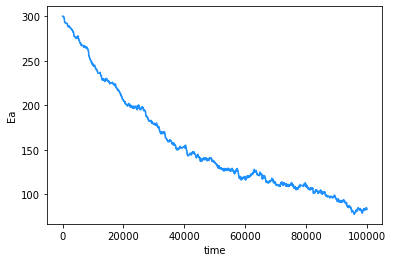

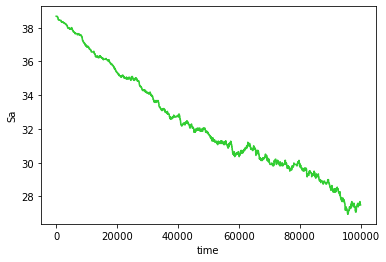

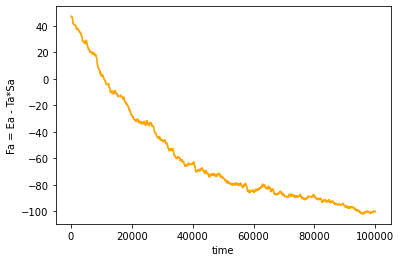

The graphs before averaging




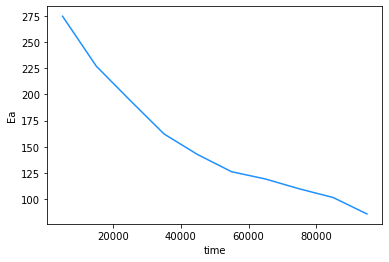

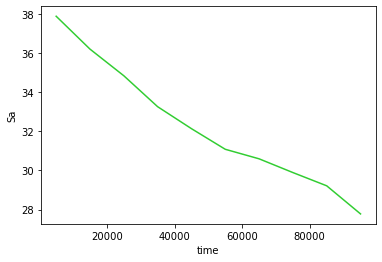

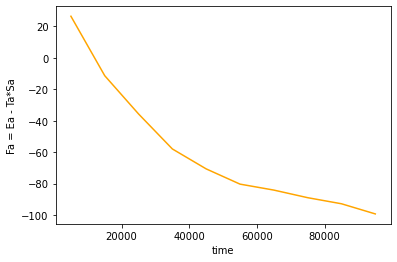

In [9]:
print('Case 1: Canonical Ensemble')
N = 1000
Na = 10
q = 10000
qa = 300
Iterations = 100000
no_of_points = 10000
Canonical(N, Na, q, qa, Iterations, no_of_points)

Case 2: Canonical Ensemble
Na =  10
Nb =  990
qa =  0
qb =  10000
The initial qa/Na =  0.0
The initial qb/Nb =  10.1010101010101
No. of Iterations =  100000


The graphs before averaging




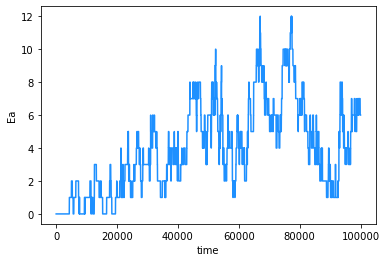

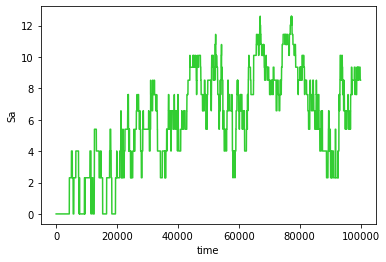

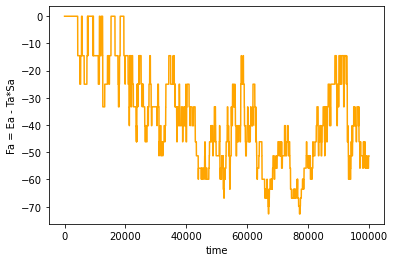

The graphs before averaging




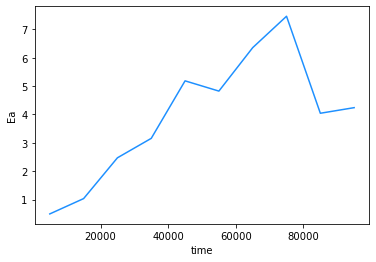

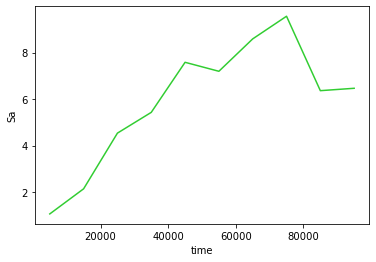

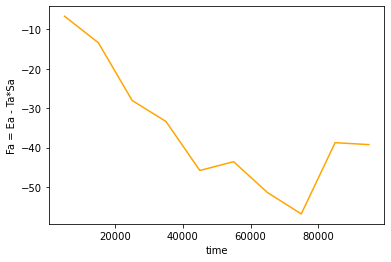

In [10]:
print('Case 2: Canonical Ensemble')
N = 1000
Na = 10
q = 10000
qa = 0
Iterations = 100000
no_of_points = 10000
Canonical(N, Na, q, qa, Iterations, no_of_points)

# GRAND-CANONICAL ENSEMBLE

In [11]:
def Grand_Canonical(N, Nsys, E, Esys, no_of_areas, no_of_points):
    # Initialization Process
    # Creating Area list just for convenience
    Areas_list = []
    for i in range(1,no_of_areas + 1):
        Areas_list.append('Area'+str(i))

    # Initial paricle distribution.
    # let N be the the total no.of particles.
    # Area1 be our system and N1 be Nsys.
    # N is the total no.of particles and Nsys is the no of particles in Area1 i.e. our system.
    N_other = N - Nsys
    # Putting the initial Number of particles of the system (Nsys) in the 1st position (0th index) in N_areas 
    # list.
    N_areas = [Nsys]
    # Now, let us randomly assign the no. of particles in each area from Area2 to Area5
    # This will be generating random integer number with the the condition that nothing is left or exceeded in
    # in the N_other
    for i in range(1, len(Areas_list)):
        n = np.random.randint(N_other)
        N_areas.append(n)
        N_other = N_other - n
    if sum(N_areas) != N:
        random_index = np.random.randint(1, len(N_areas))
        N_areas[random_index] = N_areas[random_index] + (N - sum(N_areas))
    # Initial Energy distribution.
    # let E be the the total energy.
    # Area1 be our system and E1 be Esys.
    # E is the total energy and Esys is the energy in Area1 i.e. our system.
    E_other = E - Esys
    # Putting the Initial Energy of the system (Esys) in the 1st position (0th index) in E_areas list.
    E_areas = [Esys]
    # Now, let us randomly assign the initial energy to each area from Area2 to last Area
    # This will be generating random integer number with the the condition that nothing is left or exceeded in
    # in the E_other
    for i in range(1, len(Areas_list)):
        if N_areas[i] == 0:
            e = 0
            E_areas.append(e)
        else:
            e = np.random.randint(E_other)
            E_areas.append(e)
            E_other = E_other - e
    # if sum of E_areas is not equal to Total energy, do it any how!
    while sum(E_areas) != E:
        random_index = np.random.randint(1, len(E_areas))
        if N_areas[random_index] != 0:
            E_areas[random_index] = E_areas[random_index] + (E - sum(E_areas))

    # Preparinng for Simulation.
    # No.of iterations to be carried out is given in the input.
    # Creating the time array with the length equal to number of iterations.
    time = np.zeros(Iterations)
    # Creating an array Nsys_array with the length equal to number of iterations.
    # Nsys_array will store the data of particles left in the system after each iteration.
    Nsys_array = np.zeros(Iterations)
    # Creating an array Esys_array with the length equal to number of iterations.
    # Esys_array will store the total energy left in the system after each iteration.
    Esys_array = np.zeros(Iterations)
    # Creating an array Ssys_array with the length equal to number of iterations.
    # Ssys_array will store the data of entropy of system after each iteration.
    Ssys_array = np.zeros(Iterations)
    # Creating an array of Temperature (Tb_kb)
    Tres_kb = np.zeros(Iterations)

    print('Nsystem = ',Nsys)
    print('Nreservoir = ',N - Nsys)
    print('Esystem = ', Esys)
    print('Ereservoir = ', E - Esys)
    print('The initial Esys/Nsys = ', Esys/Nsys)
    print('The initial Eres/Nres = ', (E - Esys) / (N - Nsys))
    print('No.of Iterations = ', Iterations)
    print('\n')
    # Running the Monte-Carlo Simulation.
    for i in range(0, Iterations):
        # Storing the number of each iteration
        time[i] = i
        """Any two areas Ai and Aj are selected randomly and energy as well as particles transfer takes place 
        from Ai to Aj if Ai has atleast one unit of energy and atleast one particle"""
        Ai = np.random.randint(0, len(Areas_list) - 1)
        Aj = np.random.randint(0, len(Areas_list) - 1)
        if (Ai != Aj) and (N_areas[Ai] > 1) and (E_areas[Ai] >= 1):
            # Transfer of average energy
            energy = E_areas[Ai] / N_areas[Ai]
            E_areas[Ai] = E_areas[Ai] - energy
            E_areas[Aj] = E_areas[Aj] + energy

            # Transfer of a particle
            N_areas[Ai] = N_areas[Ai] - 1 
            N_areas[Aj] = N_areas[Aj] + 1 

        elif (Ai != Aj) and (N_areas[Aj] > 1) and (E_areas[Aj] >= 1):
            # Transfer of average energy
            energy = E_areas[Aj] / N_areas[Aj]
            E_areas[Aj] = E_areas[Aj] - energy
            E_areas[Ai] = E_areas[Ai] + energy

            # Transfer of a particle
            N_areas[Aj] = N_areas[Aj] - 1 
            N_areas[Ai] = N_areas[Ai] + 1
        # Calculating the number of particles in our system that is area 1 and updating it in Nsys_array
        Ns = N_areas[0]
        Nsys_array[i] = Ns

        # Calculating the energy of our system and updating it in Esys_array
        Es = E_areas[0]
        Esys_array[i] = Es

        # Calculating the microstates and Entropy of our system and updating it in Ssys_array
        Omega_sys = comb((Nsys - 1 + Es), Es)
        Ssys_kb = np.log(Omega_sys)
        Ssys_array[i] = Ssys_kb

        # Calculating Temperature of reservoir and updating it in temperature array.
        Eres = sum(E_areas) - Es
        Nres = sum(N_areas) - Ns
        Tres_kb[i] = (2 / 3) * (Eres/ Nres)

    # Calculating helmoltz free energy
    Fsys_array = Esys_array - (Tres_kb * Ssys_array)

    # Plotting the quantities
    print('The graphs before averaging')
    print('\n')
    plotting_list = [Ssys_array, Esys_array, Nsys_array, Fsys_array]
    colors = ['dodgerblue', 'limegreen', 'orange', 'blueviolet']
    plotting_names = ['Ssys', 'Esys', 'Nsys', 'Fsys = Esys - (Tres * Ssys)']

    for p in range(0, len(plotting_list)):
            plt.plot(time, plotting_list[p], color = colors[p])
            plt.xlabel('time')
            plt.ylabel(plotting_names[p])
            plt.show()

    # Using the condition_average_sum to make new arrays
    time_new = condition_average_sum(time, no_of_points)
    Ssys_new = condition_average_sum(Ssys_array, no_of_points)
    Esys_new = condition_average_sum(Esys_array, no_of_points)
    Nsys_new = condition_average_sum(Nsys_array, no_of_points)
    Fsys_new = condition_average_sum(Fsys_array, no_of_points)

    # Plotting the quantities
    print('The graphs after averaging')
    print('\n')
    plotting_list = [Ssys_new, Esys_new, Nsys_new, Fsys_new]
    colors = ['dodgerblue', 'limegreen', 'orange', 'blueviolet']
    plotting_names = ['Ssys', 'Esys', 'Nsys', 'Fsys = Esys - (Tres * Ssys)']

    for p in range(0, len(plotting_list)):
        plt.plot(time_new, plotting_list[p], color = colors[p])
        plt.xlabel('time')
        plt.ylabel(plotting_names[p])
        plt.show()

Case 1: Grand-Canonical Ensemble
Nsystem =  10
Nreservoir =  990
Esystem =  300
Ereservoir =  9700
The initial Esys/Nsys =  30.0
The initial Eres/Nres =  9.797979797979798
No.of Iterations =  70000


The graphs before averaging




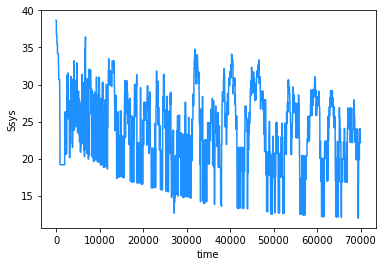

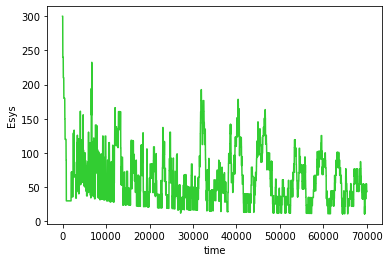

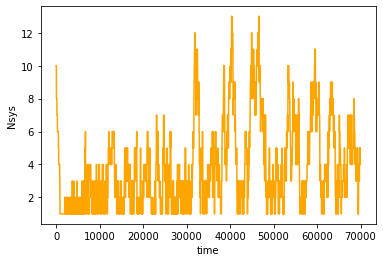

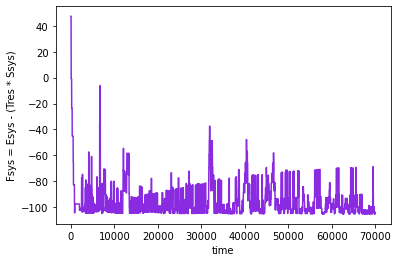

The graphs after averaging




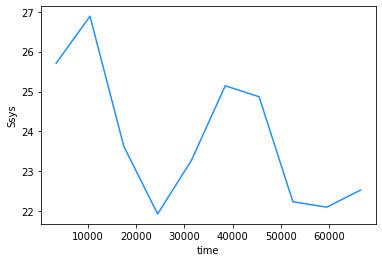

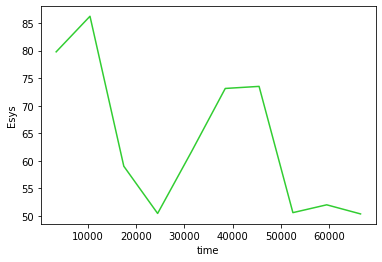

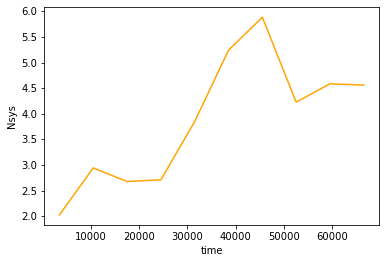

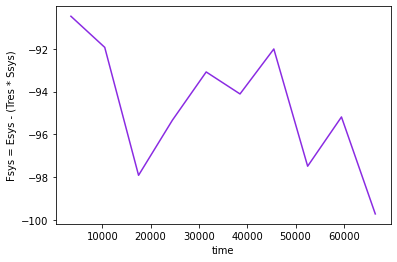

In [18]:
print('Case 1: Grand-Canonical Ensemble')
N = 1000
Nsys = 10
E = 10000
Esys = 300
Iterations = 70000
no_of_points = 7000
no_of_areas = 100
Grand_Canonical(N, Nsys, E, Esys, no_of_areas, no_of_points)

Case 2: Grand-Canonical Ensemble
Nsystem =  10
Nreservoir =  990
Esystem =  0
Ereservoir =  10000
The initial Esys/Nsys =  0.0
The initial Eres/Nres =  10.1010101010101
No.of Iterations =  100000


The graphs before averaging




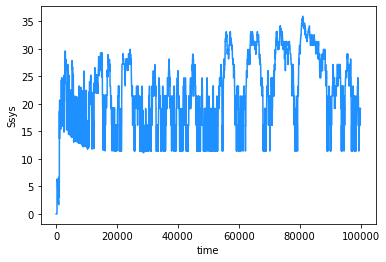

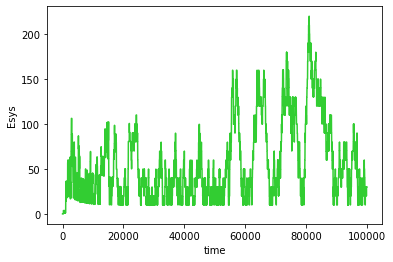

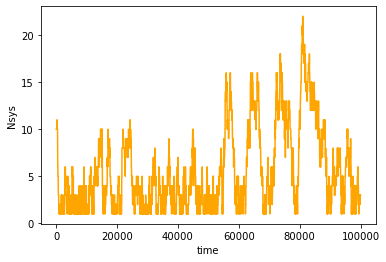

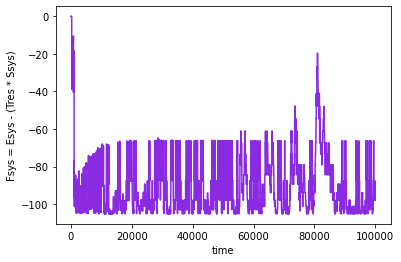

The graphs after averaging




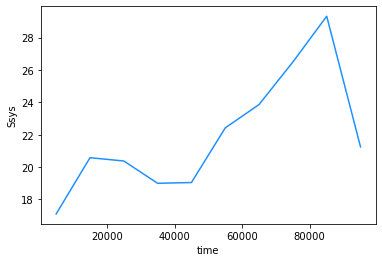

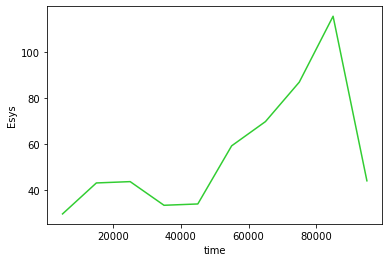

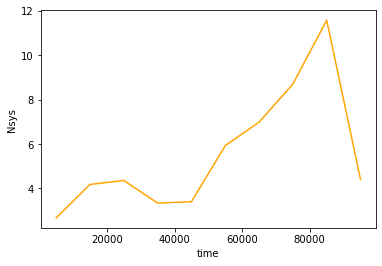

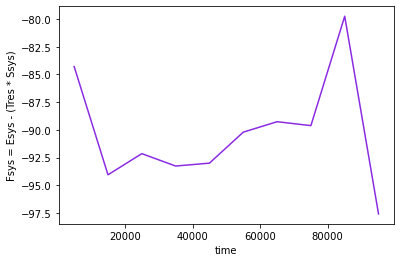

In [19]:
print('Case 2: Grand-Canonical Ensemble')
N = 1000
Nsys = 10
E = 10000
Esys = 0
Iterations = 100000
no_of_points = 10000
no_of_areas = 100
Grand_Canonical(N, Nsys, E, Esys, no_of_areas, no_of_points)